In [ ]:
%ls

In [ ]:
import pandas as pd

df_main = pd.read_csv('data_B.csv')
df_main.head(5)

In [ ]:
df = df_main.copy()
df.head(5)

In [5]:
print(df.dtypes)
print('------------' *10)

#check missing values
print(df.isnull().sum())
print('------------' *10)

print(df.shape)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability          object
dtype: object
------------------------------------------------------------------------------------------------------------------------
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
------------------------------------------------------------------------------------------------------------------------
(3276, 10)


In [6]:
#take care of missing values
df.fillna(df.mean(), inplace = True)
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [7]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,Not Portable
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,Portable
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,Not Portable
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,Not Portable
4,6.615350,179.240661,26392.863612,9.309160,333.775777,496.363562,12.786595,78.262369,4.453443,Portable


In [8]:
#encoding using  key-value pairs

df['Potability'] = df['Potability'].map({'Portable':1, 'Not Portable':0})
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,0
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,1
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,0
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,0
4,6.615350,179.240661,26392.863612,9.309160,333.775777,496.363562,12.786595,78.262369,4.453443,1


In [10]:
x = df.drop('Potability', axis=1)
y = df['Potability']

In [12]:
y

0       0
1       1
2       0
3       0
4       1
       ..
3271    1
3272    1
3273    0
3274    0
3275    1
Name: Potability, Length: 3276, dtype: int64

In [44]:
import random

ts = (random.randint(2, 70)) / 100
rs = random.randint(1,50)

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = ts, random_state = rs)

In [47]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1403,3.846814,190.992873,26895.257956,5.629536,333.775777,660.254946,18.125202,78.153575,3.584202
2674,7.283914,197.602125,23112.504435,9.502809,332.331985,449.361679,14.458591,70.000219,3.571863
2360,6.341751,139.959471,18058.320292,8.361337,417.602446,347.464419,13.314422,58.220982,4.019011
1854,8.832142,176.808661,12171.024549,7.475336,321.257628,395.387337,12.481552,65.867189,3.914512
1255,9.241198,223.691350,21610.581297,4.116183,333.775777,480.013056,12.725428,65.550704,5.265729
...,...,...,...,...,...,...,...,...,...
618,8.775486,157.354289,22113.391452,7.931503,304.807845,480.715208,15.692839,82.929345,4.393944
2004,5.772770,186.060603,26693.761607,5.808580,333.073364,312.869364,12.376272,32.761161,4.154685
227,8.967244,266.478743,34446.782262,4.909573,333.775777,343.265556,14.263396,64.959670,3.742256
2761,6.492627,213.065385,34314.087091,9.041146,335.291926,313.254743,11.135312,70.829110,3.378778


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

pred = knn.predict(x_test)

In [49]:
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
print(cm)

[[363 129]
 [210 117]]


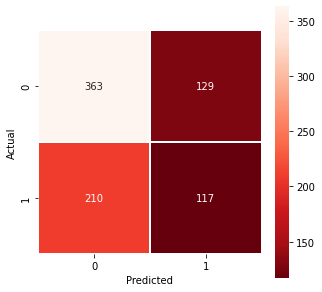

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True, fmt='d', linewidths=0.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       492
           1       0.48      0.36      0.41       327

    accuracy                           0.59       819
   macro avg       0.55      0.55      0.55       819
weighted avg       0.57      0.59      0.57       819

